# Importing the libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import pingouin as pg
import plotly.figure_factory as ff
import scipy
from scipy import stats
from scipy.stats import t, ttest_1samp, ttest_ind
import math
import pickle

from numpy import mean, std

import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.4f}'.format

import sklearn
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, train_test_split, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.datasets import make_classification, load_iris
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import yellowbrick
from yellowbrick.model_selection import CVScores, FeatureImportances
from yellowbrick.exceptions import YellowbrickValueError
from yellowbrick.classifier import ROCAUC

In [2]:
iris = datasets.load_iris()

# Importing the dataset

In [3]:
survey = pd.read_csv('survey.csv')
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Exploratory Data Analysis

In [4]:
survey.sample(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
944,2014-08-28 23:57:07,28,Male,United States,WA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat easy,Maybe,No,Some of them,No,No,Maybe,No,No,NaN
828,2014-08-28 15:40:32,29,female,United Kingdom,NaN,No,No,Yes,Rarely,6-25,...,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No,NaN
458,2014-08-27 15:59:41,32,Male,United Kingdom,NaN,No,No,No,Never,6-25,...,Don't know,Maybe,No,Some of them,No,No,Yes,Yes,No,NaN
914,2014-08-28 18:50:47,25,Female,Canada,NaN,No,Yes,Yes,Sometimes,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,No,Don't know,No,NaN
1191,2015-02-21 04:16:05,34,Male,Canada,NaN,No,Yes,No,Sometimes,More than 1000,...,Don't know,Maybe,No,No,No,No,Maybe,Don't know,No,NaN


In [5]:
survey.shape

(1259, 27)

In [6]:
survey.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [7]:
survey.select_dtypes(exclude='object').agg(['mean','median','min','max','std','kurt'])

,Age
mean,79428148.3114
median,31.0000
min,-1726.0000
max,99999999999.0000
std,2818299442.9820
kurt,1259.0000


In [8]:
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Data cleaning

## Duplicates

In [9]:
survey.duplicated().sum()

0

No duplicates found

## Missing values

In [10]:
survey.shape

(1259, 27)

In [11]:
survey.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

### Dropping the entire comments and state column for too many missing values

The comments and state columns will need to be dropped entirely as they contain to many missing values and cannot be filled with specific data

In [12]:
survey.drop(['comments','state'], axis=1, inplace=True)

In [13]:
survey.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [14]:
survey.shape

(1259, 25)

### Drop missing values

In [15]:
survey.dropna(inplace=True)

In [16]:
survey.isna().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [17]:
survey.shape

(977, 25)

## Structural errors

In [18]:
pd.to_datetime(survey.Timestamp)

18     2014-08-27 11:34:53
20     2014-08-27 11:35:12
21     2014-08-27 11:35:24
22     2014-08-27 11:35:48
23     2014-08-27 11:36:24
               ...        
1252   2015-08-20 16:52:09
1253   2015-08-25 19:59:38
1255   2015-09-26 01:07:35
1256   2015-11-07 12:36:58
1258   2016-02-01 23:04:31
Name: Timestamp, Length: 977, dtype: datetime64[ns]

In [19]:
cat_df = survey.select_dtypes(include='object')
cat_df.head()

,Timestamp,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,2014-08-27 11:34:53,male,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,2014-08-27 11:35:12,Male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,2014-08-27 11:35:24,male,United States,Yes,No,No,Never,1-5,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,2014-08-27 11:35:48,Male,United States,No,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,2014-08-27 11:36:24,Male,United States,No,No,Yes,Never,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No


In [20]:
def value_counter():
    
    for col in cat_df:
        freq = cat_df[col].value_counts()
        
        print(col)
        print('_' * 40)
        print(freq)
        print('_' * 40)
        print('_' * 40)
value_counter()

Timestamp
________________________________________
2014-08-27 15:23:51    2
2014-08-27 12:31:41    2
2014-08-27 15:24:47    2
2014-08-28 09:59:39    2
2014-08-27 15:55:07    2
                      ..
2014-08-27 15:55:08    1
2014-08-27 15:56:37    1
2014-08-27 15:58:23    1
2014-08-27 15:59:41    1
2016-02-01 23:04:31    1
Name: Timestamp, Length: 967, dtype: int64
________________________________________
________________________________________
Gender
________________________________________
Male                                              471
male                                              156
Female                                            103
M                                                  85
female                                             51
F                                                  31
m                                                  23
f                                                  13
Make                                                4
Male           

### Replacing categories in Gender column to only have Male, Female and Other

In [21]:
survey.Gender.replace(['male','M','m','make','Make','Man','Male ', 'Cis Male','Mail','msle','something kinda male?','Malr','Mal','ostensibly male, unsure what that really means',
                       'cis male','maile','Guy (-ish) ^_^','Guy','Male-ish','Cis Man','male leaning androgynous','Male (CIS)'], 'Male',inplace=True)

survey.Gender.replace(['Female', 'Female ','female','F','f','Woman','Female (trans)','Female  ', 'Femake','femail','Cis Female','Trans-female','woman','Trans woman','cis-female/femme',
'Female (cis)'], 'Female',inplace=True)

survey.Gender.replace(['non-binary','p','Nah','Androgyne','queer','Neuter', 'queer/she/they','Genderqueer','All','A little about you','Agender','fluid','Enby'], 'Other',inplace=True)

In [22]:
survey.Gender.value_counts()

Male      754
Female    210
Other      13
Name: Gender, dtype: int64

## Outliers

In [23]:
survey.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,2014-08-27 11:34:53,46,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,2014-08-27 11:35:12,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,2014-08-27 11:35:24,31,Male,United States,Yes,No,No,Never,1-5,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,2014-08-27 11:35:48,46,Male,United States,No,No,Yes,Often,26-100,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,2014-08-27 11:36:24,41,Male,United States,No,No,Yes,Never,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No


In [24]:
num_df = survey.select_dtypes(exclude='object')
num_df.head()

,Age
18,46
20,29
21,31
22,46
23,41


In [25]:
num_df.mean()

Age   102354176.0389
dtype: float64

<AxesSubplot:>

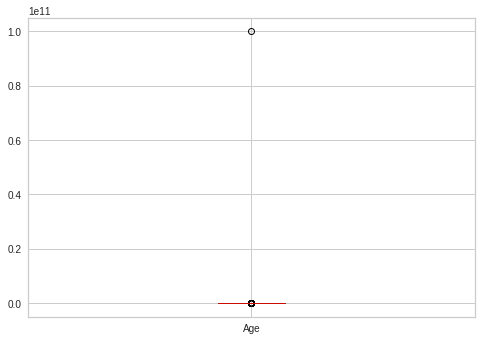

In [26]:
num_df.plot.box()

In [27]:
survey.Age.unique()

array([         46,          29,          31,          41,          33,
                35,          34,          37,          32,          30,
                42,          40,          27,          24,          18,
                38,          26,          22,          44,          23,
                36,          28,          39,          25,          45,
                21,          19,          43,          56,          54,
               329,          55, 99999999999,          57,          58,
                48,          47,          62,          51,          50,
                49,          20,       -1726,          53,          61,
                 8,          11,          -1,          72,          60])

There are extreme, unrealistic values in the Age column

In [28]:
#find Q1, Q3, and interquartile range for each column
Q1 = num_df.quantile(q=.25)
Q3 = num_df.quantile(q=.75)
IQR = num_df.apply(stats.iqr)

In [29]:
survey = survey[~((survey.select_dtypes(exclude='object') < (Q1-1.5*IQR)) | (survey.select_dtypes(exclude='object') > (Q3+1.5*IQR))).any(axis=1)]

In [30]:
num_df = survey.select_dtypes(exclude='object')
num_df.head()

,Age
18,46
20,29
21,31
22,46
23,41


<AxesSubplot:>

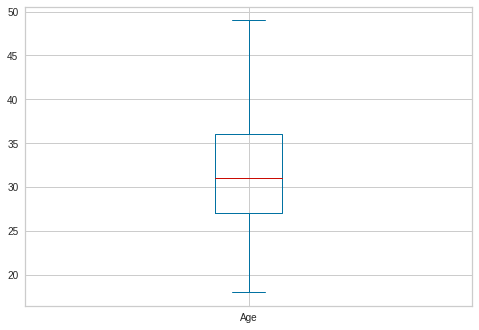

In [31]:
num_df.plot.box()

In [32]:
num_df.agg(['min','max','mean','median','std','kurt'])

,Age
min,18.0000
max,49.0000
mean,31.6504
median,31.0000
std,6.3352
kurt,-0.3689


In [33]:
survey.shape

(944, 25)

# Exploratory Data Analysis (Data Visualization)

In [34]:
survey.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,2014-08-27 11:34:53,46,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,2014-08-27 11:35:12,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,2014-08-27 11:35:24,31,Male,United States,Yes,No,No,Never,1-5,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,2014-08-27 11:35:48,46,Male,United States,No,No,Yes,Often,26-100,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,2014-08-27 11:36:24,41,Male,United States,No,No,Yes,Never,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No


## Visualization of gender

In [35]:
survey.Gender.value_counts()

Male      726
Female    208
Other      10
Name: Gender, dtype: int64

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = survey, x = 'Gender')
plt.title('Visualization of gender distribution')
plt.grid()

## Visualization of people seeking treatment by gender

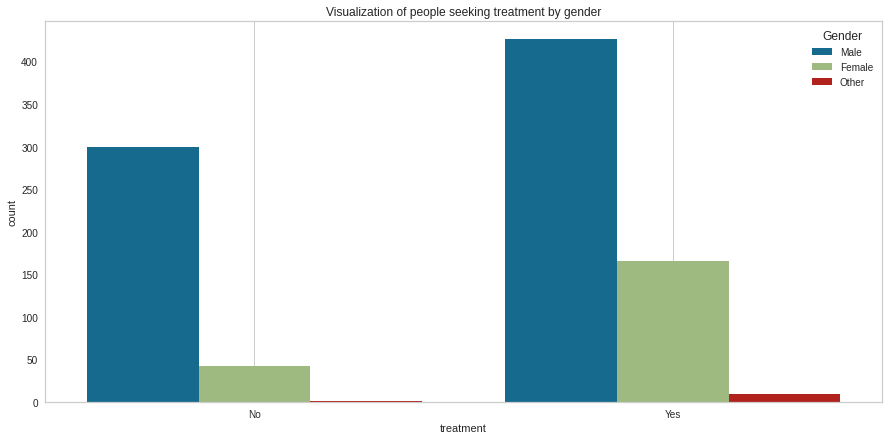

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(data = survey, x = 'treatment', hue = 'Gender')
plt.title('Visualization of people seeking treatment by gender')
plt.grid()

The data has a majority of male respondents as the tech industry has more Males than Females at the time of analysis (2021).

In all gender categories, there are more respondents seeking treatment as oppossed to those who do not.

The number of males not seeking treatment is significantly higher than the other gender categories (Female and Other)

In [37]:
survey.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,2014-08-27 11:34:53,46,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,2014-08-27 11:35:12,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,2014-08-27 11:35:24,31,Male,United States,Yes,No,No,Never,1-5,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,2014-08-27 11:35:48,46,Male,United States,No,No,Yes,Often,26-100,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,2014-08-27 11:36:24,41,Male,United States,No,No,Yes,Never,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No


## Visualization of people in self employment by gender

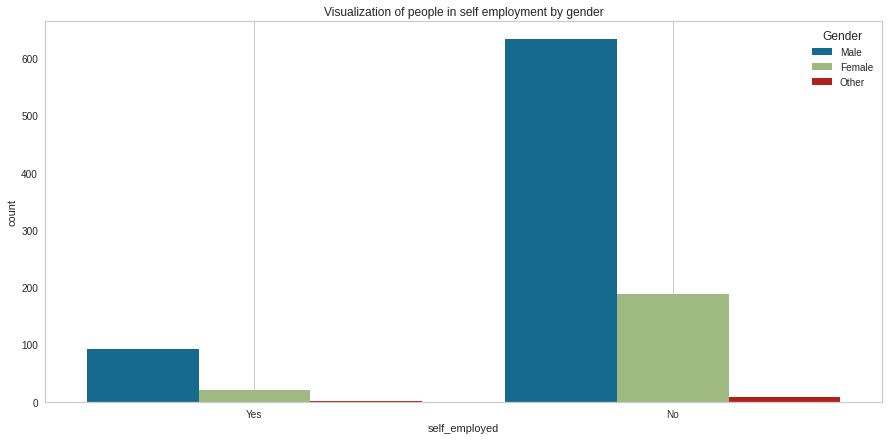

In [38]:
plt.figure(figsize=(15,7))
sns.countplot(data = survey, x = 'self_employed', hue = 'Gender')
plt.title('Visualization of people in self employment by gender')
plt.grid()

While most people are not self employed, a majority of those who are, are male.

This is likely due to majority of the respondents being male and the tech industry being mostly male dominated.

In [39]:
survey.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,2014-08-27 11:34:53,46,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,2014-08-27 11:35:12,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,2014-08-27 11:35:24,31,Male,United States,Yes,No,No,Never,1-5,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,2014-08-27 11:35:48,46,Male,United States,No,No,Yes,Often,26-100,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,2014-08-27 11:36:24,41,Male,United States,No,No,Yes,Never,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No


## Visualization of Family history

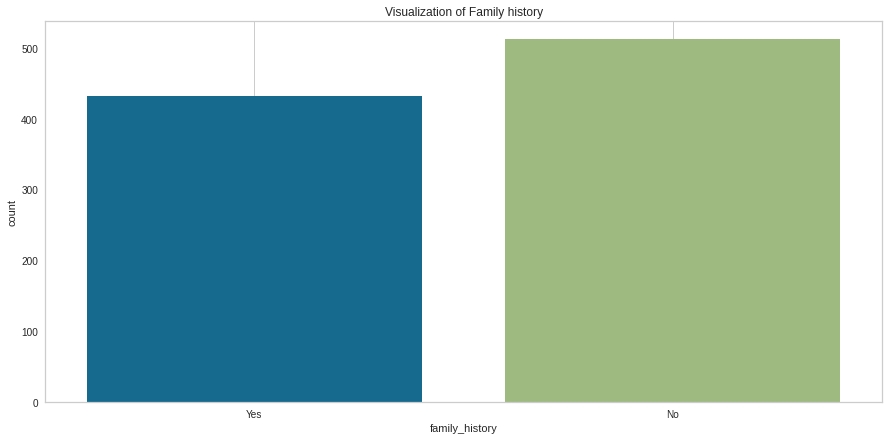

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(data = survey, x = 'family_history')
plt.title('Visualization of Family history')
plt.grid()

In [41]:
survey.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,2014-08-27 11:34:53,46,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,2014-08-27 11:35:12,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,2014-08-27 11:35:24,31,Male,United States,Yes,No,No,Never,1-5,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,2014-08-27 11:35:48,46,Male,United States,No,No,Yes,Often,26-100,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,2014-08-27 11:36:24,41,Male,United States,No,No,Yes,Never,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No


## Visualization of Number of employees by Tech company

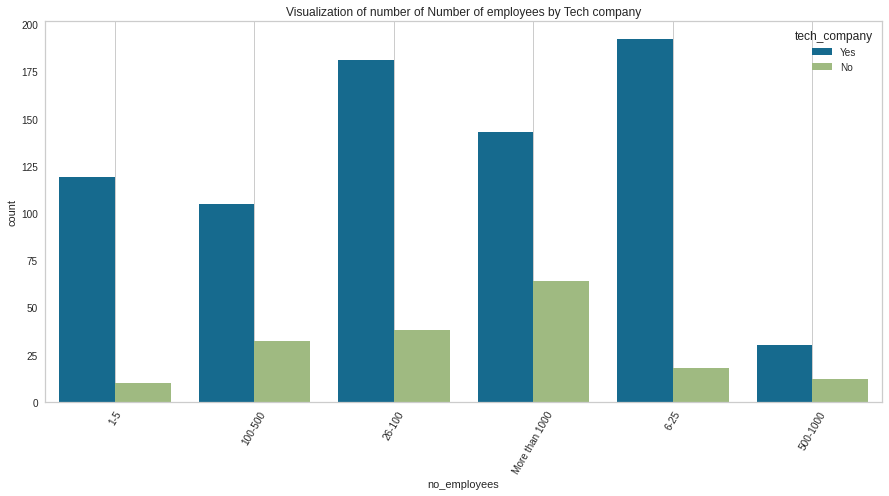

In [42]:
plt.figure(figsize=(15,7))
sns.countplot(data = survey, x = 'no_employees', hue = 'tech_company')
plt.title('Visualization of number of Number of employees by Tech company')
plt.xticks(rotation = 60)
plt.grid()

In [43]:
survey.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,2014-08-27 11:34:53,46,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,2014-08-27 11:35:12,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,2014-08-27 11:35:24,31,Male,United States,Yes,No,No,Never,1-5,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,2014-08-27 11:35:48,46,Male,United States,No,No,Yes,Often,26-100,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,2014-08-27 11:36:24,41,Male,United States,No,No,Yes,Never,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No


## Visualization of Wellness program by Number of employees

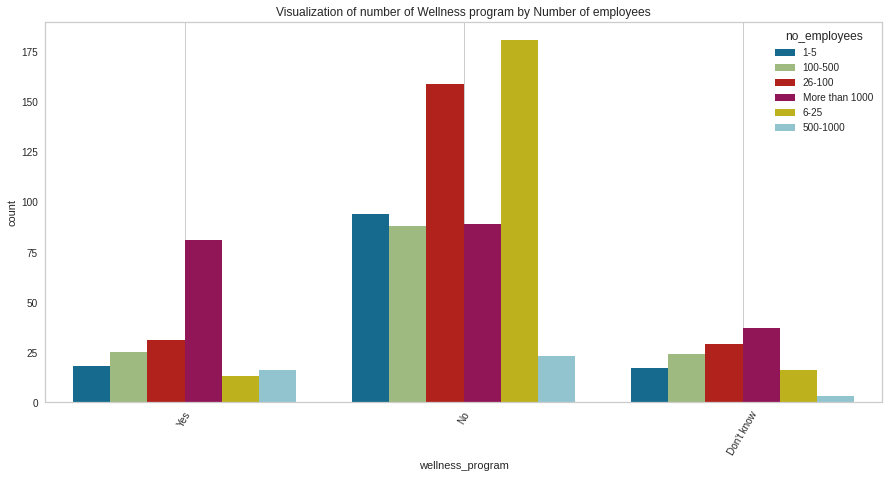

In [44]:
plt.figure(figsize=(15,7))
sns.countplot(data = survey, x = 'wellness_program', hue = 'no_employees')
plt.title('Visualization of Wellness program by Number of employees')
plt.xticks(rotation = 60)
plt.grid()

## Visualization of number of respondents by Country

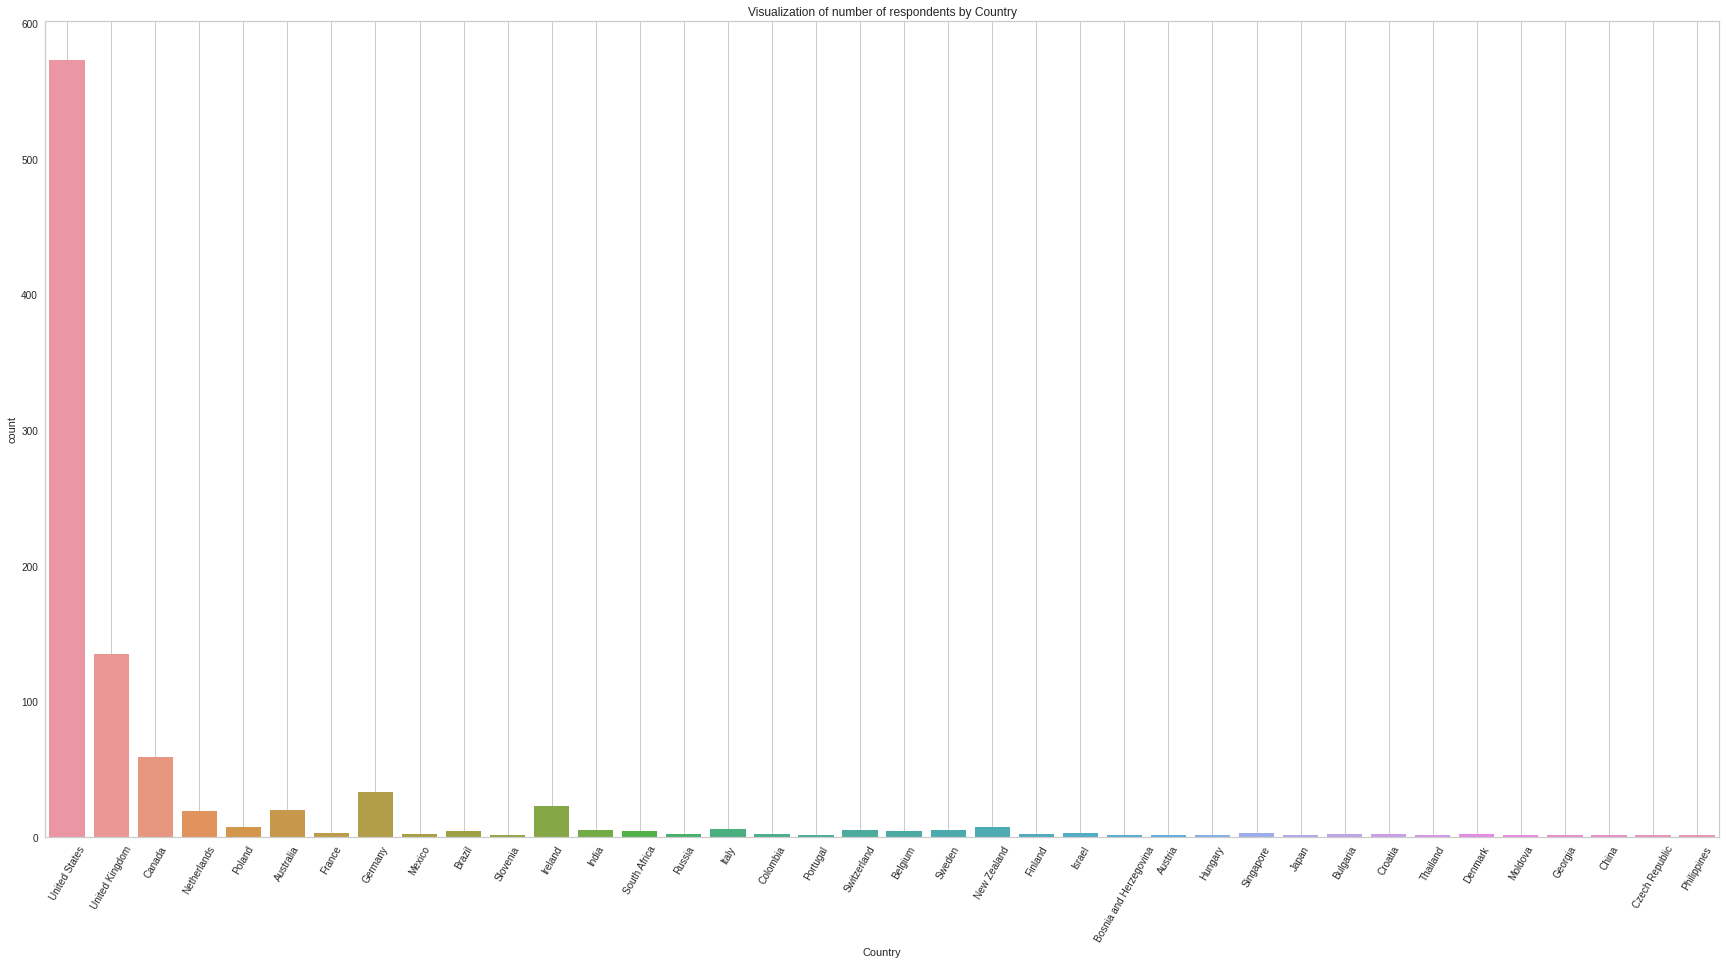

In [45]:
plt.figure(figsize=(30,15))
sns.countplot(data = survey, x = 'Country')
plt.title('Visualization of number of respondents by Country')
plt.xticks(rotation = 60)
plt.grid()

An overwhelming majority of the respondents are from the US followed by the UK.

This is because a majority of world leading tech companies are based in the US eg Amazon, Facebook, Google etc.

## Visualization of distribution of age

In [46]:
survey.Age.mean()

31.65042372881356

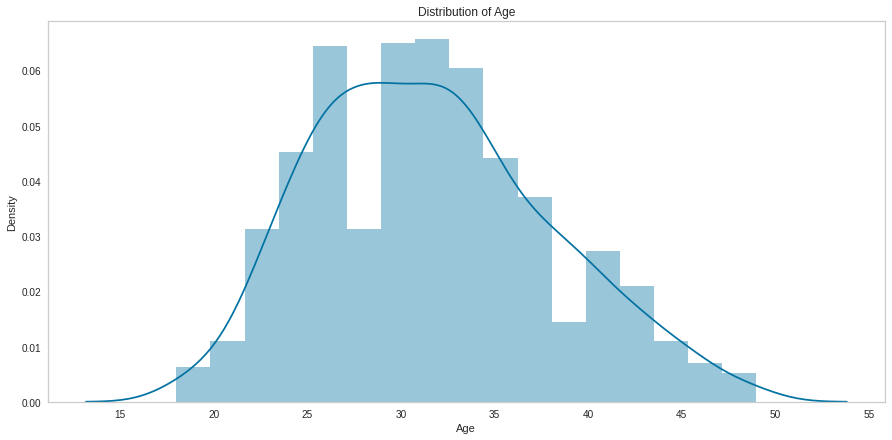

In [47]:
plt.figure(figsize=(15,7))
sns.distplot(survey.Age)
plt.title('Distribution of Age')
plt.grid()

In [48]:
survey.Age.agg(['skew', 'kurt'])

skew    0.3781
kurt   -0.3689
Name: Age, dtype: float64

Age seems to be slightly positively skewed as the right tail is slightly longer than the left tail

It is also normally distributed based on the skewness as it falls between -0.5 and 0.5

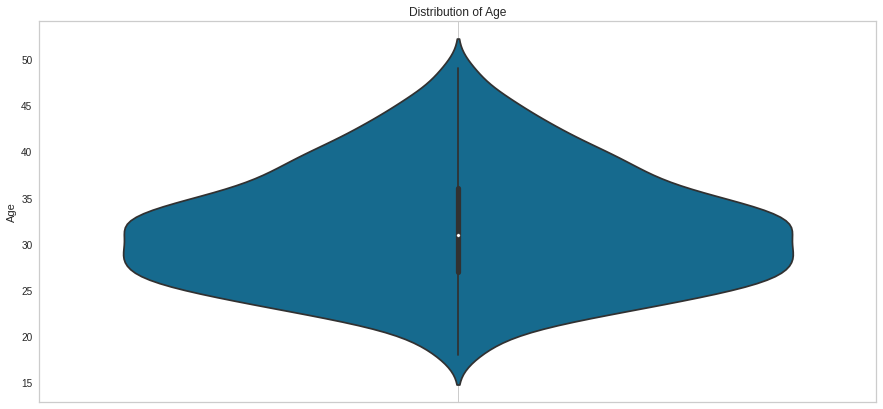

In [49]:
plt.figure(figsize=(15,7))
sns.violinplot(data = survey, y= 'Age')
plt.title('Distribution of Age')
plt.grid()

In [50]:
survey.shape

(944, 25)

In [51]:
survey.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,2014-08-27 11:34:53,46,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,2014-08-27 11:35:12,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,2014-08-27 11:35:24,31,Male,United States,Yes,No,No,Never,1-5,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,2014-08-27 11:35:48,46,Male,United States,No,No,Yes,Often,26-100,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,2014-08-27 11:36:24,41,Male,United States,No,No,Yes,Never,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No


# Machine Learning (Classification)

## Preparation of data for Machine Learning

### Dropping the Timestamp and Country column as they are almost insignificant to the task ahead

In [52]:
survey.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,2014-08-27 11:34:53,46,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,2014-08-27 11:35:12,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,2014-08-27 11:35:24,31,Male,United States,Yes,No,No,Never,1-5,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,2014-08-27 11:35:48,46,Male,United States,No,No,Yes,Often,26-100,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,2014-08-27 11:36:24,41,Male,United States,No,No,Yes,Never,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No


The Timestamp column will be dropped as it does affect the ML classification that will be done and has no significance

The Country column will also be dropped as the work people in tech do is really similar 

In [53]:
survey.drop(['Timestamp', 'Country'], axis=1, inplace=True)

In [54]:
survey.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,Male,Yes,Yes,No,Sometimes,1-5,Yes,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,29,Male,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,Male,Yes,No,No,Never,1-5,Yes,Yes,No,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,Male,No,No,Yes,Often,26-100,Yes,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,41,Male,No,No,Yes,Never,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No


In [55]:
survey.shape

(944, 23)

### Separation of the predictor and dependent variables

In [56]:
x = survey.drop('treatment', axis=1)
y = survey.treatment #response/dependent variable

print(x.shape)
x.head()

(944, 22)


,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,Male,Yes,Yes,Sometimes,1-5,Yes,Yes,Yes,Not sure,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,29,Male,No,Yes,Sometimes,100-500,No,Yes,Yes,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,Male,Yes,No,Never,1-5,Yes,Yes,No,No,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,Male,No,No,Often,26-100,Yes,Yes,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,41,Male,No,No,Never,More than 1000,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No


### Encoding using LabelEncoder

Using Label encoder instead of dummies will make feature selection much easier

In [57]:
def encoder():
  le = LabelEncoder()
  new_cat_df = x.select_dtypes(include='object')

  for col in new_cat_df:
    x[col] = le.fit_transform(x[col])

  print(x.shape)
encoder()

(944, 22)


In [58]:
x.sample(10)

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
776,43,1,0,0,3,4,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
828,29,0,0,0,2,4,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0
1166,29,1,0,1,3,2,0,0,2,2,...,0,0,0,1,1,0,1,0,0,0
463,26,0,0,1,0,2,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0
1230,23,0,0,1,3,4,0,1,1,2,...,2,4,1,1,2,2,0,0,2,0
894,40,1,0,1,1,3,1,1,0,1,...,0,0,0,0,1,1,1,2,0,0
633,34,0,0,0,3,1,1,1,2,2,...,0,2,0,1,1,2,1,1,2,0
971,30,1,1,0,3,4,0,1,1,2,...,1,3,2,2,0,0,1,1,2,1
1150,32,1,0,0,3,5,0,1,2,2,...,2,1,0,0,1,1,1,1,0,1
544,28,2,0,1,2,1,0,1,1,1,...,2,1,2,2,1,1,2,1,1,1


In [59]:
survey.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,Male,Yes,Yes,No,Sometimes,1-5,Yes,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,29,Male,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,Male,Yes,No,No,Never,1-5,Yes,Yes,No,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,Male,No,No,Yes,Often,26-100,Yes,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,41,Male,No,No,Yes,Never,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No


### Splitting the data into training and testing sets

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2500)

print('size of train predictors: {} and size of train labels: {}'.format(x_train.shape, y_train.shape))
print('size of test predictors: {} and size of test labels: {}'.format(x_test.shape, y_test.shape))

size of train predictors: (660, 22) and size of train labels: (660,)
size of test predictors: (284, 22) and size of test labels: (284,)


## Building classification models

In [61]:
LogReg = LogisticRegression()
LogReg_fit = LogReg.fit(x_train, y_train)

KNN = KNeighborsClassifier()
KNN_fit = KNN.fit(x_train, y_train)

SVM = SVC()
SVM_fit = SVM.fit(x_train, y_train)

DecTree = DecisionTreeClassifier(max_depth=5)
DecTree_fit = DecTree.fit(x_train, y_train)

RF = RandomForestClassifier(max_depth=15,max_features=10,random_state=15)
RF_fit = RF.fit(x_train, y_train)

LDA = LinearDiscriminantAnalysis()
LDA_fit = LDA.fit(x_train, y_train)

GBC = GradientBoostingClassifier()
GBC_fit = GBC.fit(x_train, y_train)

ADA = AdaBoostClassifier()
ADA_fit = ADA.fit(x_train, y_train)

ETC = ExtraTreesClassifier()
ETC_fit = ETC.fit(x_train, y_train)

## Performance of the models

In [62]:
score_df = pd.DataFrame({
    'models': ['LogReg', 'KNN', 'SVM', 'DecTree', 'RF', 'LDA', 'GBC', 'ADA', 'ETC'],

    'train_score': [LogReg_fit.score(x_train, y_train)*100,
                    KNN_fit.score(x_train, y_train)*100,
                    SVM_fit.score(x_train, y_train)*100,
                    DecTree_fit.score(x_train, y_train)*100,
                    RF_fit.score(x_train, y_train)*100,
                    LDA_fit.score(x_train, y_train)*100,
                    GBC_fit.score(x_train, y_train)*100,
                    ADA_fit.score(x_train, y_train)*100,
                    ETC_fit.score(x_train, y_train)*100],

    'test_score': [LogReg_fit.score(x_test, y_test)*100,
                   KNN_fit.score(x_test, y_test)*100,
                   SVM_fit.score(x_test, y_test)*100,
                   DecTree_fit.score(x_test, y_test)*100,
                   RF_fit.score(x_test, y_test)*100,
                   LDA_fit.score(x_test, y_test)*100,
                   GBC_fit.score(x_test, y_test)*100,
                   ADA_fit.score(x_test, y_test)*100,
                   ETC_fit.score(x_test, y_test)*100]
})

score_df

,models,train_score,test_score
0,LogReg,77.8788,74.6479
1,KNN,79.2424,66.5493
2,SVM,64.6970,61.2676
3,DecTree,81.0606,72.1831
4,RF,100.0000,78.1690
5,LDA,78.4848,75.3521
6,GBC,88.4848,77.1127
7,ADA,80.7576,78.5211
8,ETC,100.0000,76.0563


## Crossvalidation

In [63]:
# prepare models
def crossValidater():
    
    models = []
    models.append(('LogReg', LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('DecTree', DecisionTreeClassifier(max_depth=5)))
    models.append(('RF', RandomForestClassifier(max_depth=15,max_features=10,random_state=15)))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('GBC', GradientBoostingClassifier()))
    models.append(('ADA', AdaBoostClassifier()))
    models.append(('ETC',ExtraTreesClassifier()))
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = '%s: %.3f%% (%.3f)' % (name, cv_results.mean()*100, cv_results.std())
        print(msg)
        print('\n')
    
crossValidater()

LogReg: 76.264% (0.043)


KNN: 70.645% (0.034)


SVM: 71.611% (0.056)


DecTree: 76.055% (0.035)


RF: 77.536% (0.037)


LDA: 75.947% (0.040)


GBC: 77.116% (0.022)


ADA: 77.751% (0.020)


ETC: 76.477% (0.042)




## Feature selection

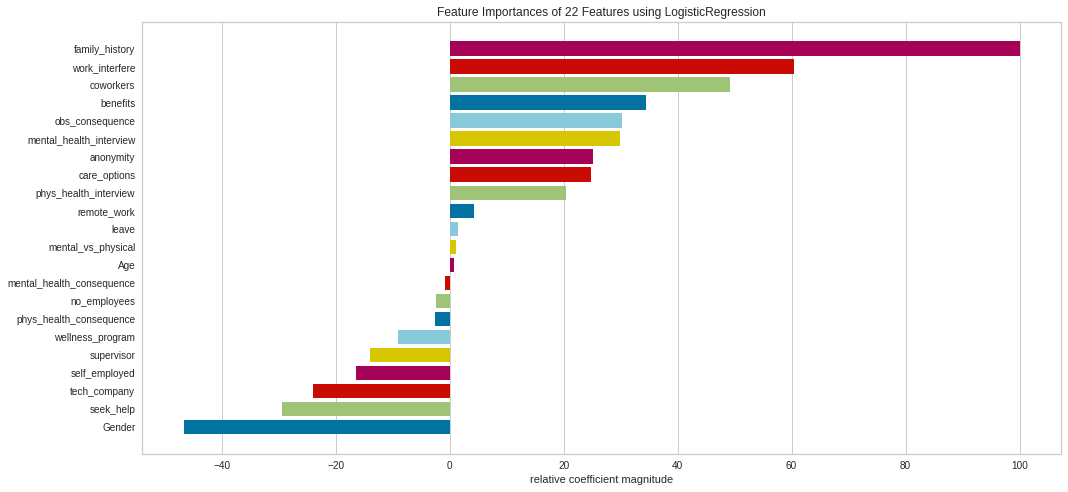

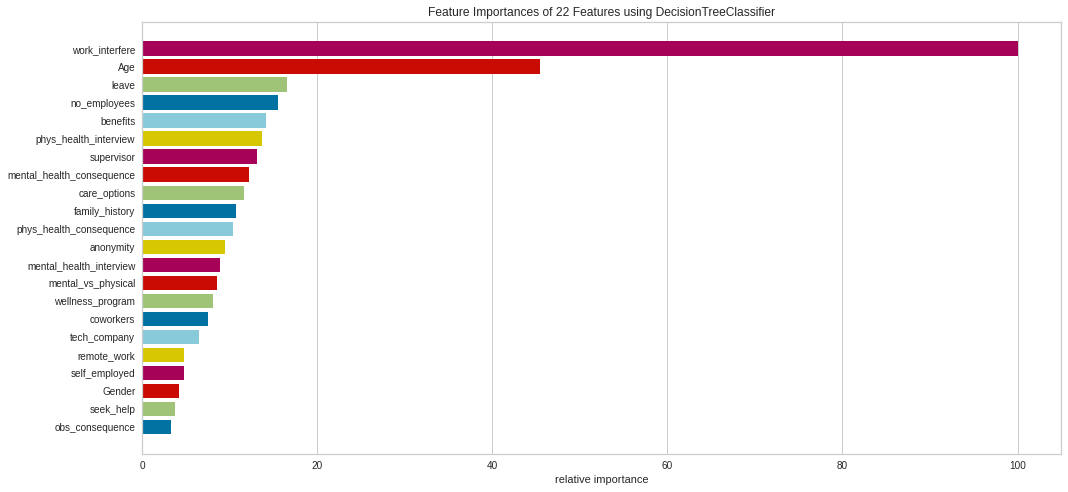

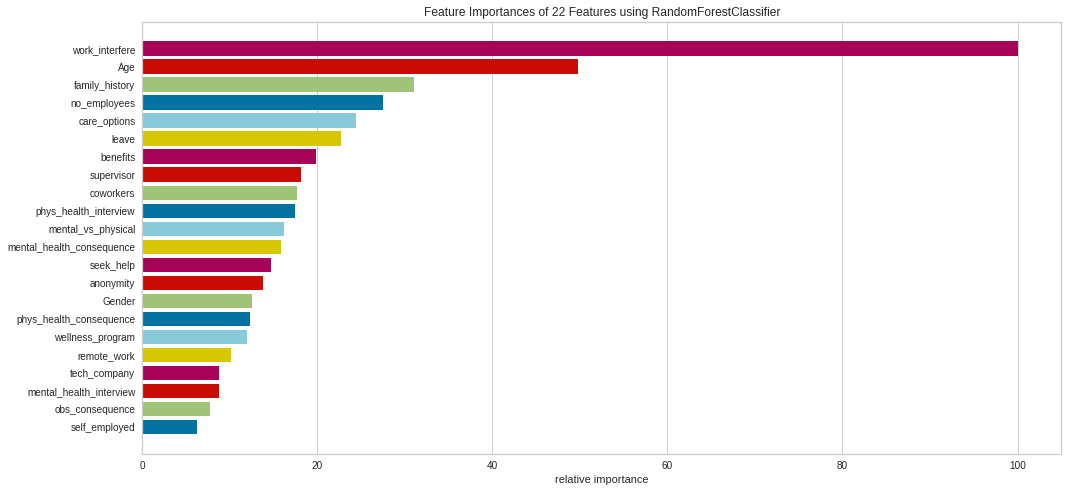

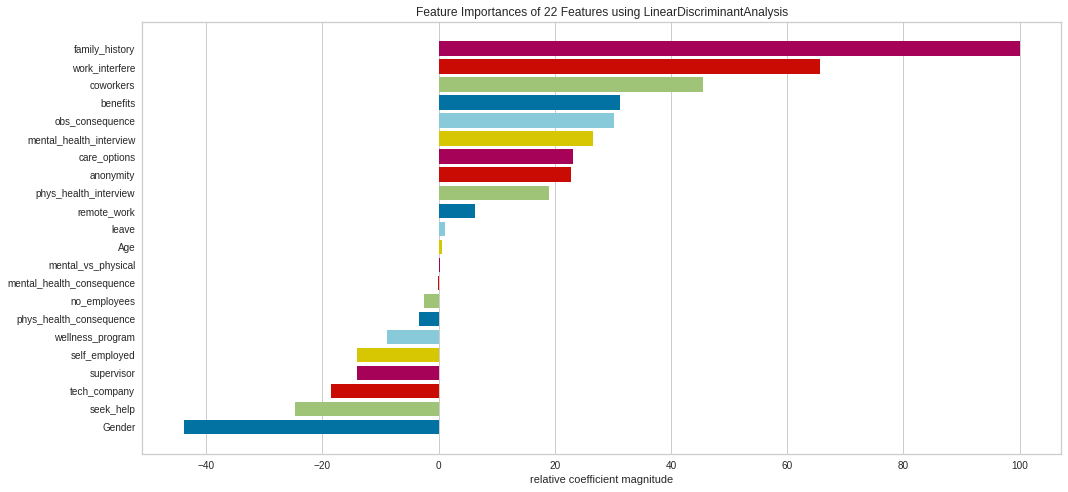

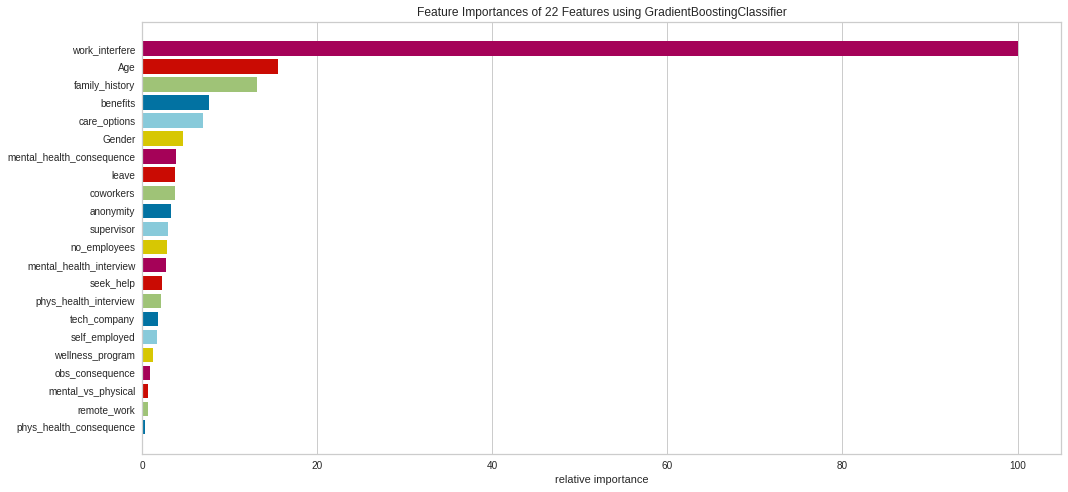

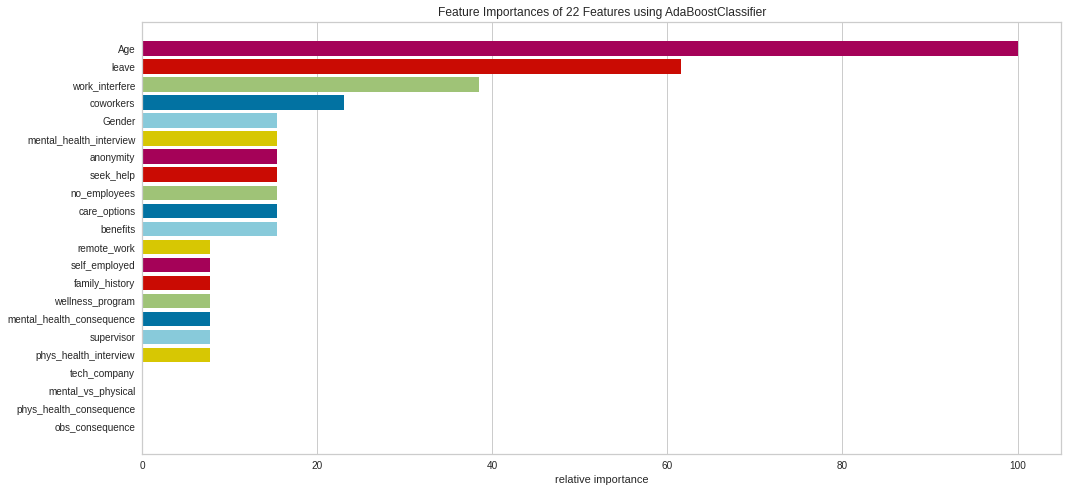

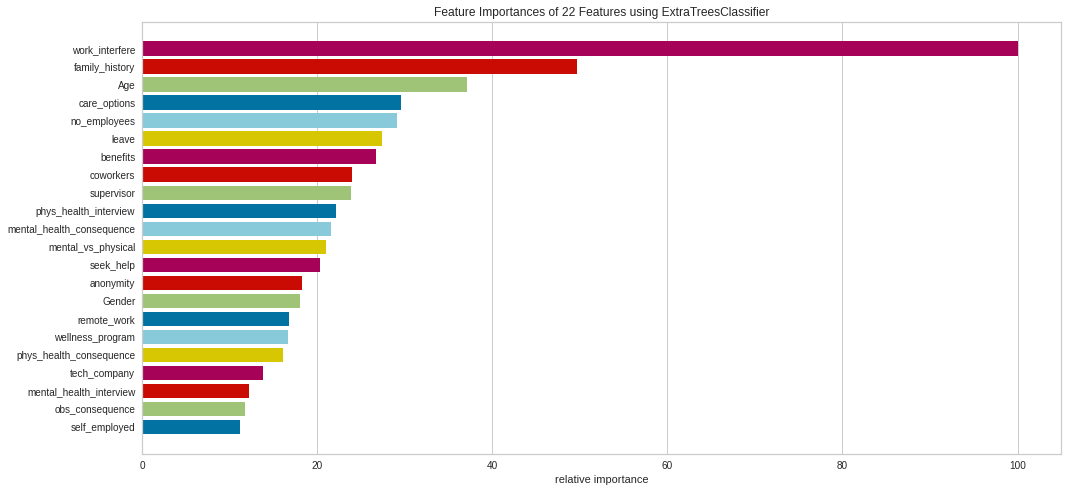

In [64]:
def feat_select():
  
    cv = KFold(n_splits=10)
    models = []
    models.append(LogisticRegression())
    # models.append(KNeighborsClassifier())
    # models.append(SVC())
    models.append(DecisionTreeClassifier())
    models.append(RandomForestClassifier())
    models.append(LinearDiscriminantAnalysis())
    models.append(GradientBoostingClassifier())
    models.append(AdaBoostClassifier())
    models.append(ExtraTreesClassifier())
    
    for model in models:
        plt.figure(figsize=(15,7))
        visualizer = FeatureImportances(model)
        visualizer.fit(x, y)        # Fit the data to the visualizer
        visualizer.show()
        
feat_select()

## Scaling

In [65]:
scaled_x = survey.drop('treatment', axis=1)

print(scaled_x.shape)
scaled_x.head()

(944, 22)


,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,Male,Yes,Yes,Sometimes,1-5,Yes,Yes,Yes,Not sure,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,29,Male,No,Yes,Sometimes,100-500,No,Yes,Yes,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,Male,Yes,No,Never,1-5,Yes,Yes,No,No,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,Male,No,No,Often,26-100,Yes,Yes,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,41,Male,No,No,Never,More than 1000,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No


### Encoding using LabelEncoder()

In [66]:
def encoder():
  le = LabelEncoder()
  new_cat_df = scaled_x.select_dtypes(include='object')

  for col in new_cat_df:
    scaled_x[col] = le.fit_transform(scaled_x[col])

  print(scaled_x.shape)
encoder()

(944, 22)


### Scaling with MinMaxScaler()

In [67]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(scaled_x)

X_scaled = pd.DataFrame(X_scaled, columns=scaled_x.columns)
X_scaled.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.9032,0.5000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.5000,...,1.0000,1.0000,0.5000,0.5000,1.0000,1.0000,0.5000,1.0000,1.0000,1.0000
1,0.3548,0.5000,0.0000,1.0000,1.0000,0.2000,0.0000,1.0000,1.0000,1.0000,...,0.5000,0.2500,0.0000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.0000
2,0.4194,0.5000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.5000,0.0000,...,1.0000,0.2500,0.5000,0.5000,0.5000,0.5000,0.5000,0.0000,1.0000,0.0000
3,0.9032,0.5000,0.0000,0.0000,0.3333,0.4000,1.0000,1.0000,1.0000,1.0000,...,0.0000,0.0000,0.0000,0.5000,0.5000,1.0000,0.5000,0.0000,0.5000,0.0000
4,0.7419,0.5000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.5000,0.0000,0.0000,0.5000,1.0000,0.0000,0.0000


MinMaxScaler worked better a little better than StandardScaler and RobustScaler

## Splitting scaled data into training and testing sets

In [68]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=2500)

print('size of train predictors: {} and size of train labels: {}'.format(X_scaled_train.shape, y_train.shape))
print('size of test predictors: {} and size of test labels: {}'.format(X_scaled_test.shape, y_test.shape))

size of train predictors: (660, 22) and size of train labels: (660,)
size of test predictors: (284, 22) and size of test labels: (284,)


## Rebuilding ML models using scaled data

In [69]:
LogReg = LogisticRegression()
LogReg_fit = LogReg.fit(X_scaled_train, y_train)

KNN = KNeighborsClassifier()
KNN_fit = KNN.fit(X_scaled_train, y_train)

SVM = SVC()
SVM_fit = SVM.fit(X_scaled_train, y_train)

DecTree = DecisionTreeClassifier(max_depth=5)
DecTree_fit = DecTree.fit(X_scaled_train, y_train)

RF = RandomForestClassifier(max_depth=15,max_features=10,random_state=15)
RF_fit = RF.fit(X_scaled_train, y_train)

LDA = LinearDiscriminantAnalysis()
LDA_fit = LDA.fit(X_scaled_train, y_train)

GBC = GradientBoostingClassifier()
GBC_fit = GBC.fit(X_scaled_train, y_train)

ADA = AdaBoostClassifier()
ADA_fit = ADA.fit(X_scaled_train, y_train)

ETC = ExtraTreesClassifier()
ETC_fit = ETC.fit(X_scaled_train, y_train)

## Performance of the models

In [70]:
new_score_df = pd.DataFrame({
    'models': ['LogReg', 'KNN', 'SVM', 'DecTree', 'RF', 'LDA', 'GBC', 'ADA', 'ETC'],

    'train_score': [LogReg_fit.score(X_scaled_train, y_train)*100,
                    KNN_fit.score(X_scaled_train, y_train)*100,
                    SVM_fit.score(X_scaled_train, y_train)*100,
                    DecTree_fit.score(X_scaled_train, y_train)*100,
                    RF_fit.score(X_scaled_train, y_train)*100,
                    LDA_fit.score(X_scaled_train, y_train)*100,
                    GBC_fit.score(X_scaled_train, y_train)*100,
                    ADA_fit.score(X_scaled_train, y_train)*100,
                    ETC_fit.score(X_scaled_train, y_train)*100],

    'test_score': [LogReg_fit.score(X_scaled_test, y_test)*100,
                   KNN_fit.score(X_scaled_test, y_test)*100,
                   SVM_fit.score(X_scaled_test, y_test)*100,
                   DecTree_fit.score(X_scaled_test, y_test)*100,
                   RF_fit.score(X_scaled_test, y_test)*100,
                   LDA_fit.score(X_scaled_test, y_test)*100,
                   GBC_fit.score(X_scaled_test, y_test)*100,
                   ADA_fit.score(X_scaled_test, y_test)*100,
                   ETC_fit.score(X_scaled_test, y_test)*100]
})

new_score_df

,models,train_score,test_score
0,LogReg,77.8788,74.2958
1,KNN,79.5455,71.8310
2,SVM,83.6364,77.4648
3,DecTree,81.0606,73.9437
4,RF,100.0000,78.1690
5,LDA,78.4848,75.3521
6,GBC,88.4848,77.1127
7,ADA,80.7576,78.5211
8,ETC,100.0000,77.8169


## Cross validation after scaling

In [71]:
# prepare models
def crossValidater():
    
    models = []
    models.append(('LogReg', LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('DecTree', DecisionTreeClassifier(max_depth=5)))
    models.append(('RF', RandomForestClassifier(max_depth=15,max_features=10,random_state=15)))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('GBC', GradientBoostingClassifier()))
    models.append(('ADA', AdaBoostClassifier()))
    models.append(('ETC',ExtraTreesClassifier()))
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, X_scaled, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = '%s: %.3f%% (%.3f)' % (name, cv_results.mean()*100, cv_results.std())
        print(msg)
        print('\n')
    
crossValidater()

LogReg: 76.158% (0.044)


KNN: 72.657% (0.037)


SVM: 75.733% (0.034)


DecTree: 76.160% (0.036)


RF: 77.430% (0.036)


LDA: 75.947% (0.040)


GBC: 77.116% (0.022)


ADA: 77.751% (0.020)


ETC: 76.269% (0.040)




Ada Boost Classifier is the most robust model used thus it will be tuned to see if there will be an impropvement in its performance

## HyperParam Tuning using GridSearchCV() with RandomForestClassifier() as the base_estimator

In [82]:
ABC = AdaBoostClassifier(base_estimator = RandomForestClassifier())

param_grid = {'base_estimator__max_depth' : [int(x) for x in np.linspace(10, 30, 10)],
              'base_estimator__min_samples_leaf' : [1, 2, 4, 6, 8],
              'n_estimators' : [int(x) for x in np.linspace(10, 30, 10)],
              'learning_rate' : [0.01, 0.1]}

clf = GridSearchCV(ABC, param_grid, cv = 10, scoring = 'accuracy', n_jobs=-1)
clf.fit(X_scaled_train,y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [10, 12, 14, 16, 18, 21,
                                                       23, 25, 27, 30],
                         'base_estimator__min_samples_leaf': [1, 2, 4, 6, 8],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 12, 14, 16, 18, 21, 23, 25, 27,
                                          30]},
             scoring='accuracy')

In [83]:
print(clf.best_params_)

{'base_estimator__max_depth': 18, 'base_estimator__min_samples_leaf': 1, 'learning_rate': 0.01, 'n_estimators': 23}


In [92]:
print(clf.best_score_ * 100)

79.0909090909091


# Preparing the built model for deployment

In [103]:
pickle.dump(clf, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))